# Nashville Housing Market Analysis

This notebook explores a sample of Nashville housing data to demonstrate a typical data analytics workflow:

- Load and inspect raw data  
- Clean and transform the dataset  
- Engineer new features (e.g., price per square foot, house age)  
- Analyze price patterns by neighborhood  
- Export a cleaned dataset for visualization in Tableau  

The raw data is stored in: `nashville_housing_raw.csv`.



## 1. Setup & Import Libraries


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 150)

# Plots inline
%matplotlib inline


## 2. Load the Dataset


In [26]:
file_path = "/content/drive/MyDrive/nashville-housing-analysis/nashville_housing_raw.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",1802 STEWART PL,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,No,No,"WHITFORD, KAREN",224 PEACHTREE ST,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [27]:
df.columns = df.columns.str.strip()

print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Parcel ID', 'Land Use', 'Property Address', 'Suite/ Condo   #', 'Property City', 'Sale Date', 'Sale Price',
       'Legal Reference', 'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Owner Name', 'Address', 'City', 'State', 'Acreage', 'Tax District',
       'Neighborhood', 'image', 'Land Value', 'Building Value', 'Total Value', 'Finished Area', 'Foundation Type', 'Year Built', 'Exterior Wall',
       'Grade', 'Bedrooms', 'Full Bath', 'Half Bath'],
      dtype='object')


## 3. Overview of the Data

In [28]:
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       56636 non-null  int64  
 1   Unnamed: 0                         56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,56636.0,NaN,NaN,NaN,28317.5,16349.54926,0.0,14158.75,28317.5,42476.25,56635.0
Unnamed: 0,56636.0,NaN,NaN,NaN,28317.5,16349.54926,0.0,14158.75,28317.5,42476.25,56635.0
Parcel ID,56636,48697,097 08 0A 141.00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Land Use,56636,39,SINGLE FAMILY,34268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Address,56477,45068,1212 LAUREL ST,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Suite/ Condo #,6109,1952,1,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property City,56477,14,NASHVILLE,40280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sale Date,56636,1117,2013-06-28,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sale Price,56636.0,NaN,NaN,NaN,327211.128911,928742.546637,50.0,135000.0,205450.0,329000.0,54278060.0
Legal Reference,56636,52898,20150511-0042855,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Data Cleaning

In [29]:
df.columns = df.columns.str.strip()

df["Sale Date"] = pd.to_datetime(df["Sale Date"], errors="coerce")

numeric_cols = [
    "Sale Price",
    "Bedrooms",
    "Full Bath",
    "Half Bath",
    "Finished Area",
    "Year Built"
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

if "renovated_year" in df.columns:
    df["renovated_year"] = df["renovated_year"].fillna(0)

df = df.drop_duplicates()

df.head()

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",1802 STEWART PL,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,No,No,"WHITFORD, KAREN",224 PEACHTREE ST,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


## 5. Feature Engineering

In [30]:
CURRENT_YEAR = 2025

df["price_per_sqft"] = df["Sale Price"] / df["Finished Area"]

df["house_age"] = CURRENT_YEAR - df["Year Built"]

def calc_reno_age(row):
    if "renovated_year" not in row or row["renovated_year"] == 0:
        return 0
    return CURRENT_YEAR - row["renovated_year"]

df["renovation_age"] = df.apply(calc_reno_age, axis=1)

df[["price_per_sqft", "house_age", "renovation_age"]].head()

,price_per_sqft,house_age,renovation_age
0,NaN,NaN,0
1,166.666667,84.0,0
2,96.612583,25.0,0
3,14.914243,77.0,0
4,51.802946,115.0,0


## 6. Neighborhood-Level Analysis

In [31]:
neighborhood_stats = (
    df.groupby("Neighborhood")
      .agg(
          avg_price=("Sale Price", "mean"),
          avg_price_per_sqft=("price_per_sqft", "mean"),
          avg_house_age=("house_age", "mean"),
          sales_count=("Sale Price", "count")
      )
      .reset_index()
)

neighborhood_stats.sort_values("avg_price", ascending=False).head()

,Neighborhood,avg_price,avg_price_per_sqft,avg_house_age,sales_count
105,4229.0,3.235790e+06,NaN,NaN,1
42,3211.0,2.780000e+06,778.711485,75.000000,1
121,4440.0,2.625625e+06,327.057879,20.200000,8
156,6711.0,1.700000e+06,NaN,NaN,2
192,9026.0,1.426878e+06,294.041790,65.575472,227


## 7. Visualizations

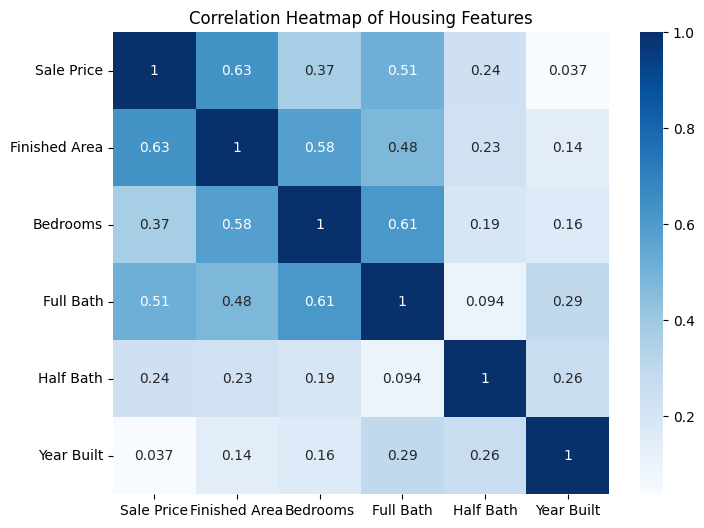

In [34]:
import seaborn as sns

numeric_cols = ["Sale Price", "Finished Area", "Bedrooms", "Full Bath", "Half Bath", "Year Built"]
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap of Housing Features")
plt.show()

## 8. Export Cleaned Dataset

In [33]:
output_path = "/content/drive/MyDrive/nashville-housing-analysis/nashville_housing_cleaned.csv"
df.to_csv(output_path, index=False)

output_path

'/content/drive/MyDrive/nashville-housing-analysis/nashville_housing_cleaned.csv'

# **Final Summary & Key Insights**

This project analyzed over **56,000 Nashville housing records** to understand pricing patterns, property characteristics, and neighborhood-level trends. After importing, cleaning, and transforming the dataset, several important findings emerged.

---

## **1. Data Cleaning & Preparation**
- Removed unnecessary columns and standardized column names  
- Converted sale dates into proper datetime format  
- Converted key fields (sale price, square footage, bedrooms, bathrooms, year built) to numeric  
- Filled missing renovation information  
- Engineered new features:
  - **Price per square foot**
  - **House age**
  - **Renovation age**
- Exported a fully cleaned dataset for further use (e.g., Tableau dashboards)

---

## **2. Feature Insights**
- Homes with more finished area and more bedrooms/bathrooms generally sold for higher prices  
- Older homes showed lower price correlations unless recently renovated  
- Price per square foot varied significantly depending on property size and characteristics  

---

## **3. Neighborhood-Level Trends**
- Some neighborhoods consistently showed **higher average sale prices**  
- Areas with newer homes or more renovated properties tended to have stronger price performance  
- Sales count varied, showing which neighborhoods had more real estate activity  

---

## **4. Visualization Highlights**
- **Bar charts** helped identify the highest-priced neighborhoods  
- **Correlation heatmap** revealed strong relationships among finished area, bedrooms, bathrooms, and sale price  
- Visualizations supported a clear interpretation of market patterns  

---

## **Overall Conclusion**
This analysis cleaned and processed the Nashville housing dataset, engineered meaningful new features, and explored pricing trends across the city.  
The findings show that **neighborhood location, home size, and property age** play major roles in determining market value.

The cleaned dataset and insights can now be used for:  
- Further visualization (e.g., Tableau dashboards)  
- Predictive modeling  
- Future real estate analysis  